# MaNGA Galaxy of the Day

Code in large part based on: https://www.sdss4.org/dr17/manga/manga-tutorials/drpall/#AccessingtheDRPallfilewithPython

In [1]:
import numpy as np   #importing the needed packages
from astropy.io import fits

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from marvin.tools.image import Image
from marvin.tools import Maps

from marvin import config
config.forceDbOff()

/home/idies/miniconda3/envs/py38/lib/python3.8/site-packages/marvin/core/exceptions.py:50: UserWarning: cannot initiate Sentry error reporting: [Errno 6] No such device or address.
  warnings.warn('cannot initiate Sentry error reporting: {0}.'.format(str(ee)),
[INFO]: No release version set. Setting default to DR17
[WARNING]: path /home/idies/workspace/sdss_sas/mangawork/manga/spectro/redux/v3_1_1/drpall-v3_1_1.fits cannot be found. Setting drpall to None. (MarvinUserWarning)
[WARNING]: path /home/idies/workspace/sdss_sas/mangawork/manga/spectro/analysis/v3_1_1/3.1.0/dapall-v3_1_1-3.1.0.fits cannot be found. Setting dapall to None. (MarvinUserWarning)


In [4]:
drpall = fits.open('drpall-v3_1_1.fits')  #assumes you are in the same directory as the DRPall file
tbdata = drpall[1].data

# Print column names
#tbdata.columns.names
print('All data entries in the DRPall, N = ', len(tbdata))
#Result Expected: All data entries in the DRPall, N =  11273

# Find all main and ancillary target data cubes 
cube_bools = (tbdata['mngtarg1'] != 0) | (tbdata['mngtarg3'] != 0)
cubes = tbdata[cube_bools]

# Find galaxies excluding those from the Coma, IC342, M31, and globular cluster ancillary programs (bits 19,20,21,27)
targ3 = tbdata['mngtarg3']
galaxies = tbdata[cube_bools & ((targ3 & 1<<19) == 0) & ((targ3 & 1<<20) == 0) & ((targ3 & 1<<21) == 0) & ((targ3 & 1<<27) == 0) ]
print('Number of galaxies', len(galaxies))
# Result expected: Number of galaxies 10296

# Get unique galaxies
uniq_vals, uniq_idx=np.unique(galaxies['mangaid'], return_index=True)
uniq_galaxies = galaxies[uniq_idx]
print('Unique galaxies', len(uniq_galaxies))
# Result: Unique galaxies 10160

All data entries in the DRPall, N =  11273
Number of galaxies 10296
Unique galaxies 10160


# 8
MaNGA galaxy of the day. An image and three MaNGA maps of MaNGA-ID=11866-6102.
The maps and image together show the location and motions of stars and ionized gas in the galaxy, and represent just a handful of the information MaNGA obtains for each galaxy.
https://dr17.sdss.org/marvin/galaxy/11866-6102/
ALT: Four views of galaxy MaNGA-ID=11866-6102. (1) SDSS image which usually shows blue/orange blobs on a black background, over which is a magenta hexagon, showing the region of sky in the other three plots. The axes are Right Ascension, and Declination which are the sky coordinates. (2) Plot title: ‘Ionized gas (Halpha) flux’ which usually shows a roughly hexagonal blue/green area in a gray box. The axes are labeled ‘spaxel’ (spatial pixel). There is a color bar at right which shows the scale to convert from the blue/green colors to flux in units of 1e-17 ergs/spaxel/cm^2. This is custom made for each specific galaxy. (3) Plot title: ‘Stellar Velocity’ and (4) ‘Ionized gas (Halpha) 

(<Figure size 864x648 with 7 Axes>,
 <AxesSubplot:title={'center':'Ionized gas (H$_\\alpha$) velocity'}, xlabel='spaxel', ylabel='spaxel'>)

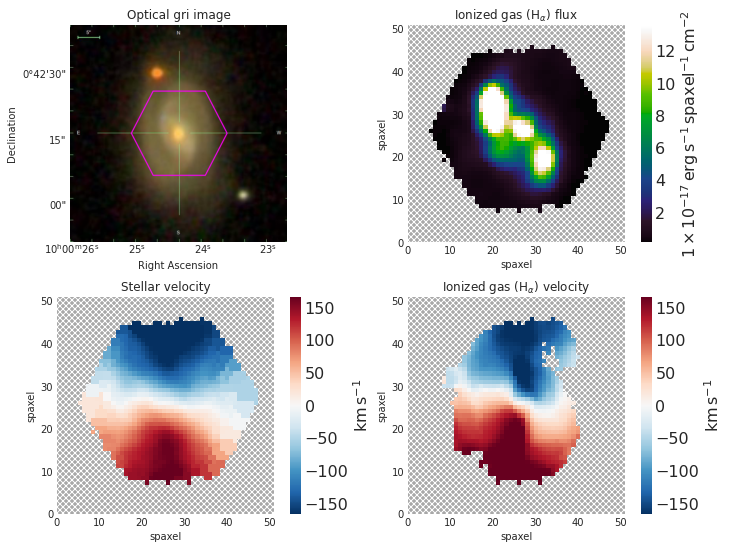

In [6]:
CustomText=['The maps and image together show the location and motions of stars and ionized gas in the galaxy, and represent just a handful of the information MaNGA obtains for each galaxy.',
            'This galaxy, picked by @KarenLMasters, has a strong spiral arm feature in both the image and ionised gas, revealing star formation in the arms.',
             'This galaxy, picked by @KarenLMasters, has a gas velocity field which looks like the peace symbol.']

#Here is where you can loop over all galaxies
k=7
galaxy=uniq_galaxies['plateifu'][k]
i=0
if galaxy=='10220-12705': i=1
if galaxy=='12512-9102': i=2

#galaxy='11975-12701'

maps = Maps(galaxy)
image = Image(plateifu=galaxy)

print('#', k+1)
print('MaNGA galaxy of the day. An image and three MaNGA maps of MaNGA-ID={}.'.format(galaxy.strip()))
print(CustomText[i])
print('https://dr17.sdss.org/marvin/galaxy/{}/'.format(galaxy.strip()))

print('ALT: Four views of galaxy MaNGA-ID={}. (1) SDSS image which usually shows blue/orange blobs on a black background, over which is a magenta hexagon, showing the region of sky in the other three plots. The axes are Right Ascension, and Declination which are the sky coordinates. (2) Plot title: ‘Ionized gas (Halpha) flux’ which usually shows a roughly hexagonal blue/green area in a gray box. The axes are labeled ‘spaxel’ (spatial pixel). There is a color bar at right which shows the scale to convert from the blue/green colors to flux in units of 1e-17 ergs/spaxel/cm^2. This is custom made for each specific galaxy. (3) Plot title: ‘Stellar Velocity’ and (4) ‘Ionized gas (Halpha) velocity’ are both (usually) red/blue rough hexagons in gray boxes. Both have ‘spaxel’ labels on the axes, and a color-bar to convert from color in the image to positive (red) or negative (blue) velocities in km/s.'.format(galaxy.strip()))

#List of map names to select from
mapname = ['emline_gflux_halpha','stellar_vel', 'stellar_sigma', 'emline_gvel_halpha', 'specindex_dn4000', 'specindex_mgb']

#Selection of three maps to show
i=0 #Ionized gas (Halpha) flux
j=1 #Stellar velocity
k=3 #Ionized gas (Halpha) velocity
#i=2 #Stellar sigma
#i=4 #Dn4000
#k=5 #Mgb index

# Set up the Multiplot.
fig = plt.figure(figsize=(12, 9))
gs = gridspec.GridSpec(2, 2, wspace=0.1, hspace=0.25)

#Plot the image
ax0 = plt.subplot(gs[0, 0], projection=image.wcs)
ax0.imshow(image.data)
ax0.set_xlabel('Right Ascension')
ax0.set_ylabel('Declination')
ax0.set_title('Optical gri image')
ax0.grid(visible='None')

#Plot three maps
ax1=plt.subplot(gs[0, 1])
ha=maps[mapname[i]]
mask_snr10 = (ha.snr < 10) * ha.pixmask.labels_to_value('DONOTUSE')
mask = ha.mask | mask_snr10
maps[mapname[i]].plot(ax=ax1, fig=fig, title=r'Ionized gas (H$_\alpha$) flux')
#maps[mapname[i]].plot(ax=ax1, fig=fig, cbrange=(3,50), title=r'Ionized gas (H$_\alpha$) flux')
#maps[mapname[i]].plot(ax=ax1, fig=fig, mask=mask, title=r'Ionized gas (H$_\alpha$) flux')
#maps[mapname[i]].plot(ax=ax1, fig=fig, title=r'Dn4000 Index')

#Set custom colourbar for velocities
vel_maps = [maps[mapname[k]], maps[mapname[j]]]
cbranges = [vel_map.plot(return_cbrange=True) for vel_map in vel_maps]
cb_max = np.max(np.abs(cbranges))
cbrange = (-cb_max, cb_max)
#Not working automated - manual fix
#cbrange=(-130,130)

#Stellar velocity
ax2 = plt.subplot(gs[1, 0])
maps[mapname[j]].plot(fig=fig, ax=ax2, cbrange=cbrange)
#maps[mapname[j]].plot(fig=fig, ax=ax2)

ax3 = plt.subplot(gs[1, 1])
#maps[mapname[k]].plot(ax=ax3, fig=fig , title=r'Ionized gas (H$_\alpha$) velocity')
#Mask out SNR<10 values in the HA velocity map and use range in stellar map
maps[mapname[k]].plot(ax=ax3, fig=fig , mask=mask, cbrange=cbrange, title=r'Ionized gas (H$_\alpha$) velocity')
#maps[mapname[k]].plot(ax=ax3, fig=fig , title=r'Mgb Index')

#Improvement implemented. 
#Make stellar and gas velocity have the same scale. 
#S/N filter in the hexagon for Halpha S/N>10